# Statistical Analysis of the Labels
With the goal of finding patterns and suitable distributions for the input of a GAN
Using pandas and matplotlib

In [1]:
import os

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

path = '../speed/'

In [2]:
def load_data(path=path, file='real.json'):
    json_path = os.path.join(path, file)
    return pd.read_json(json_path)

In [3]:
labels_raw = load_data(file='train.json')

## Preprocessing
Splitting the vextors for q and r in individual columns

In [4]:
labels_raw.head()

,filename,q_vbs2tango,r_Vo2To_vbs_true
0,img000001.jpg,"[-0.419541, -0.484436, -0.21417899999999998, 0...","[-0.21081000000000003, -0.094466, 6.705986]"
1,img000002.jpg,"[0.516575, -0.514759, 0.6841659999999999, 0.00...","[0.116806, -0.007084, 3.046739]"
2,img000003.jpg,"[0.500257, -0.6960919999999999, 0.398871, 0.32...","[0.565498, -0.182691, 12.963307]"
3,img000004.jpg,"[0.8012, -0.20998000000000003, 0.2172079999999...","[0.326352, 0.06979, 10.924485]"
4,img000005.jpg,"[0.541851, -0.7244700000000001, -0.294286, -0....","[0.0035989999999999998, 0.057942, 3.419766]"


In [5]:
labels_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 3 columns):
filename            12000 non-null object
q_vbs2tango         12000 non-null object
r_Vo2To_vbs_true    12000 non-null object
dtypes: object(3)
memory usage: 281.3+ KB


In [6]:
labels_q = pd.DataFrame(labels_raw['q_vbs2tango'].values.tolist(), 
                       columns=['q1', 'q2', 'q3', 'q4'])

labels_r = pd.DataFrame(labels_raw['r_Vo2To_vbs_true'].values.tolist(), 
                       columns=['x', 'y', 'z'])
labels_file = pd.DataFrame(labels_raw['filename'])

In [7]:
labels_q.head()

,q1,q2,q3,q4
0,-0.419541,-0.484436,-0.214179,0.737180
1,0.516575,-0.514759,0.684166,0.009504
2,0.500257,-0.696092,0.398871,0.325731
3,0.801200,-0.209980,0.217208,0.516534
4,0.541851,-0.724470,-0.294286,-0.308118


In [8]:
labels_r.head()

,x,y,z
0,-0.210810,-0.094466,6.705986
1,0.116806,-0.007084,3.046739
2,0.565498,-0.182691,12.963307
3,0.326352,0.069790,10.924485
4,0.003599,0.057942,3.419766


In [9]:
labels_file.head()

,filename
0,img000001.jpg
1,img000002.jpg
2,img000003.jpg
3,img000004.jpg
4,img000005.jpg


In [10]:
labels = pd.concat([labels_file, labels_q, labels_r], axis=1)

In [11]:
labels.head()

,filename,q1,q2,q3,q4,x,y,z
0,img000001.jpg,-0.419541,-0.484436,-0.214179,0.737180,-0.210810,-0.094466,6.705986
1,img000002.jpg,0.516575,-0.514759,0.684166,0.009504,0.116806,-0.007084,3.046739
2,img000003.jpg,0.500257,-0.696092,0.398871,0.325731,0.565498,-0.182691,12.963307
3,img000004.jpg,0.801200,-0.209980,0.217208,0.516534,0.326352,0.069790,10.924485
4,img000005.jpg,0.541851,-0.724470,-0.294286,-0.308118,0.003599,0.057942,3.419766


## Statistical overview

In [12]:
labels.describe()

,q1,q2,q3,q4,x,y,z
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000
mean,0.003844,0.008308,-0.004804,0.040434,-0.001765,-0.003058,10.898330
std,0.524575,0.501879,0.498334,0.472168,0.321561,0.411131,6.013979
min,-0.996167,-0.987963,-0.985319,-0.997179,-2.566746,-2.808821,2.999583
25%,-0.426117,-0.411557,-0.425482,-0.325118,-0.157752,-0.192461,6.140900
50%,-0.022509,0.004877,-0.000723,0.056800,-0.001130,-0.000884,9.684316
75%,0.434949,0.420966,0.415784,0.423960,0.152282,0.191384,14.259408
max,0.995054,0.996202,0.987911,0.998974,2.356750,2.867943,40.245524


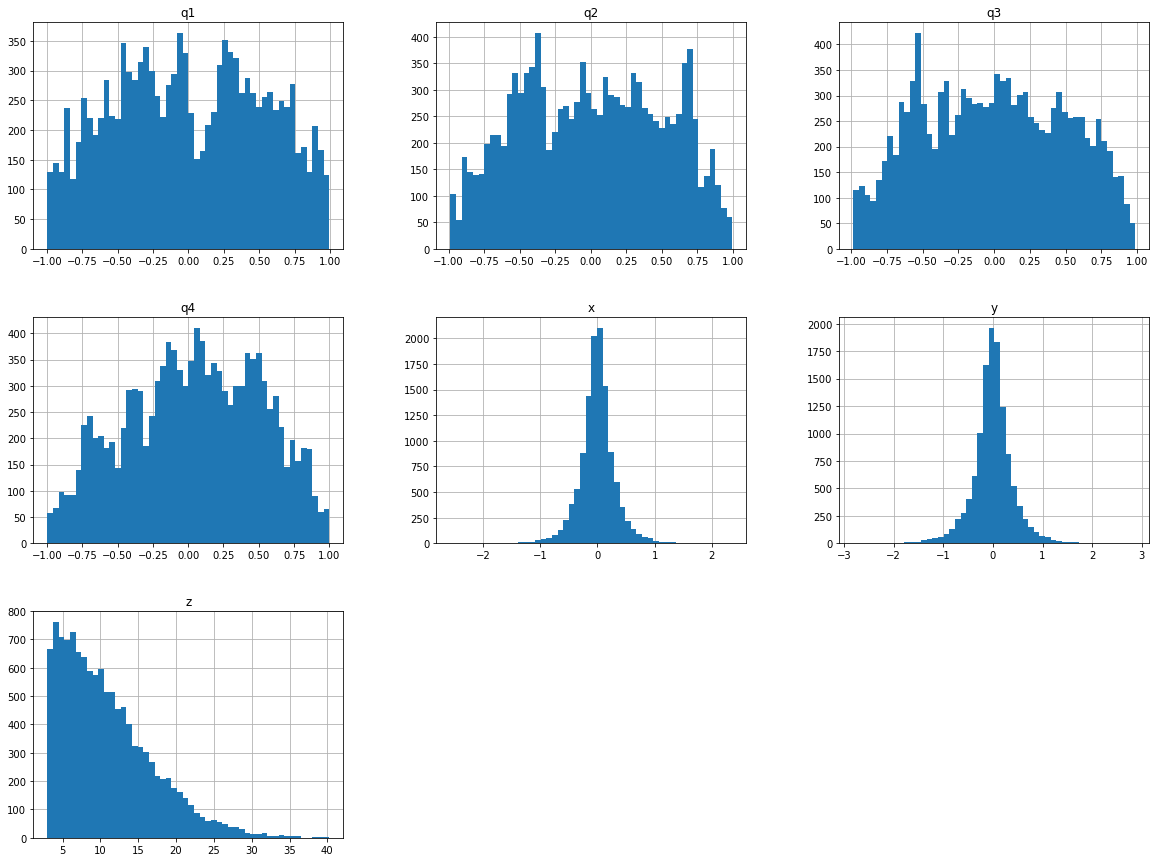

In [13]:
labels.hist(bins=50, figsize=(20, 15), zorder = 2)
plt.show()

## Visualizations of the dataset

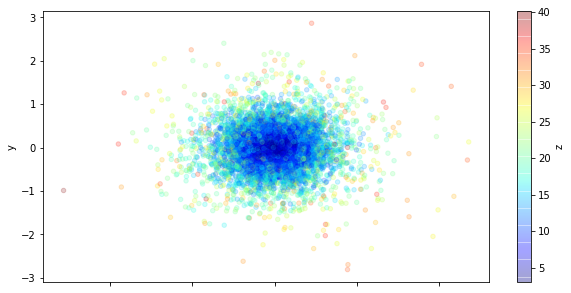

In [14]:
labels.plot(kind='scatter', x='x', y='y', alpha=0.2,
           c='z', cmap=plt.get_cmap('jet'),
           figsize=(10, 5))
plt.show()

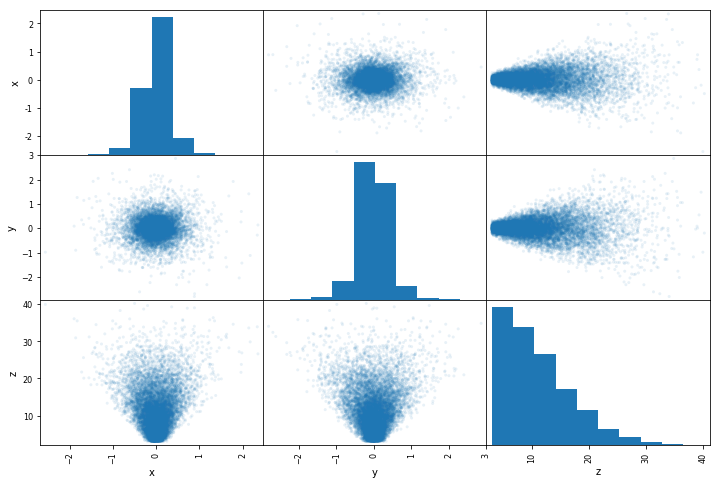

In [15]:
pd.plotting.scatter_matrix(labels[['x', 'y', 'z']], 
                           figsize=(12, 8), alpha=0.1, diagonal='hist')
plt.show()

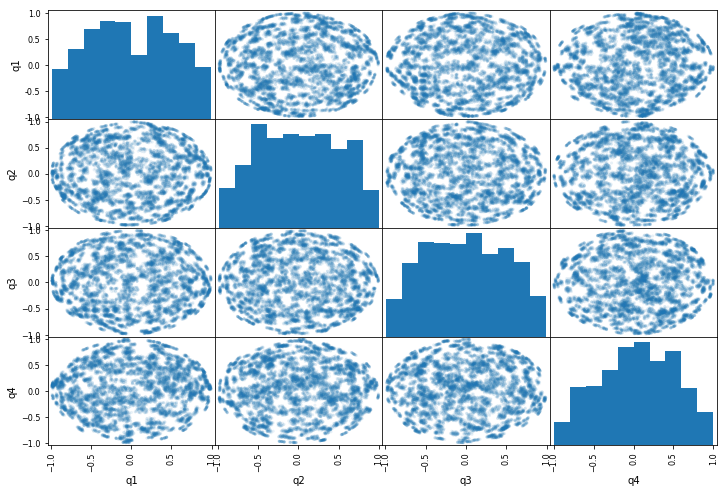

In [16]:
pd.plotting.scatter_matrix(labels[['q1', 'q2', 'q3', 'q4']], 
                           figsize=(12, 8), alpha=0.1)
plt.show()

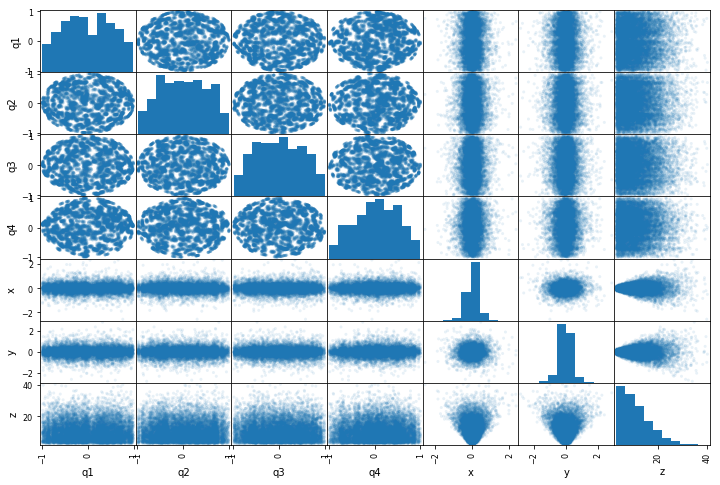

In [17]:
pd.plotting.scatter_matrix(labels, figsize=(12, 8), alpha=0.1)
plt.show()

## Correlations
There are no obvious correlations between different entries

In [18]:
corr_matrix = labels.corr()
corr_matrix["x"].sort_values(ascending=False)

x     1.000000
q4    0.011430
y     0.009623
z     0.006764
q3    0.003948
q2   -0.000255
q1   -0.001246
Name: x, dtype: float64

In [19]:
corr_matrix = labels.corr()
corr_matrix["y"].sort_values(ascending=False)

y     1.000000
q4    0.012408
x     0.009623
q2    0.000572
q1   -0.004077
z    -0.016708
q3   -0.018017
Name: y, dtype: float64

In [20]:
corr_matrix = labels.corr()
corr_matrix["z"].sort_values(ascending=False)

z     1.000000
q3    0.012400
x     0.006764
q1    0.005717
q4   -0.004436
q2   -0.008011
y    -0.016708
Name: z, dtype: float64

In [21]:
corr_matrix = labels.corr()
corr_matrix["q1"].sort_values(ascending=False)

q1    1.000000
q4    0.064674
q2    0.019751
z     0.005717
x    -0.001246
q3   -0.002476
y    -0.004077
Name: q1, dtype: float64

In [22]:
corr_matrix = labels.corr()
corr_matrix["q2"].sort_values(ascending=False)

q2    1.000000
q1    0.019751
q4    0.001004
y     0.000572
x    -0.000255
z    -0.008011
q3   -0.037345
Name: q2, dtype: float64

In [23]:
corr_matrix = labels.corr()
corr_matrix["q3"].sort_values(ascending=False)

q3    1.000000
z     0.012400
x     0.003948
q1   -0.002476
q4   -0.014414
y    -0.018017
q2   -0.037345
Name: q3, dtype: float64

In [24]:
corr_matrix = labels.corr()
corr_matrix["q4"].sort_values(ascending=False)

q4    1.000000
q1    0.064674
y     0.012408
x     0.011430
q2    0.001004
z    -0.004436
q3   -0.014414
Name: q4, dtype: float64